# <h1 align=center> PROYECTO INDIVIDUAL Nº2</h1>
# <h2 align=center>**`Mercado bursátil`**</h2>

*Data Analyst: Ada Parhuana* 

En este NOTEBOOK encontrarán toda los pasos e instrucciones necesarias para para realizar el procesamiento de los datasets.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **Índice S&P500**

In [14]:
# Descargar datos del índice S&P 500 desde Yahoo Finance
GSPC = yf.download('^GSPC', start='2000-01-01', end='2023-03-26', progress=False)

In [15]:
# Imprimir los primeros los registros del DataFrame 
GSPC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-03-20,3917.469971,3956.620117,3916.889893,3951.570068,3951.570068,5347140000
2023-03-21,3975.889893,4009.080078,3971.189941,4002.870117,4002.870117,4920240000
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000


#### Rendimiento diario del índice

In [16]:
# Calcular el rendimiento diario del índice
GSPC['daily_return']= GSPC['Adj Close'].pct_change()

In [17]:
GSPC.head(2)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345


In [18]:
# Verificamos
GSPC.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    1
dtype: int64

In [19]:
# Reemplazar el valor nulo (NaN) por 0 en la columna "daily_return"
GSPC['daily_return'] = GSPC['daily_return'].fillna(0)

In [20]:
# Verificamos
GSPC.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
daily_return    0
dtype: int64

In [21]:
# Verificamos
GSPC.duplicated().sum()

0

In [22]:
# Reiniciar el índice y establecerlo como una columna
GSPC = GSPC.reset_index()

In [26]:
# Agregar una nueva columna con el día de la semana correspondiente
GSPC['Day'] = GSPC['Date'].dt.day_name()

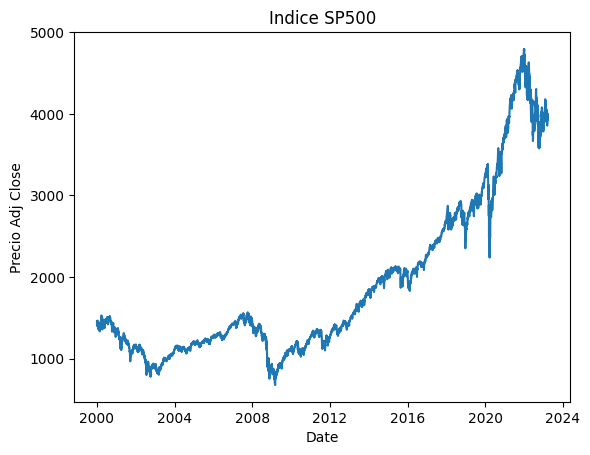

In [24]:
# Creamos un DataFrame con algunas variables de prueba
datos = GSPC

# Graficamos las dos variables utilizando la función plot() de Pandas
plt.plot(datos['Date'], datos['Adj Close'], label='Adj Close')

# Agregamos título y etiquetas a los ejes
plt.title('Indice SP500')
plt.xlabel('Date')
plt.ylabel('Precio Adj Close')

# Mostramos el gráfico
plt.show()

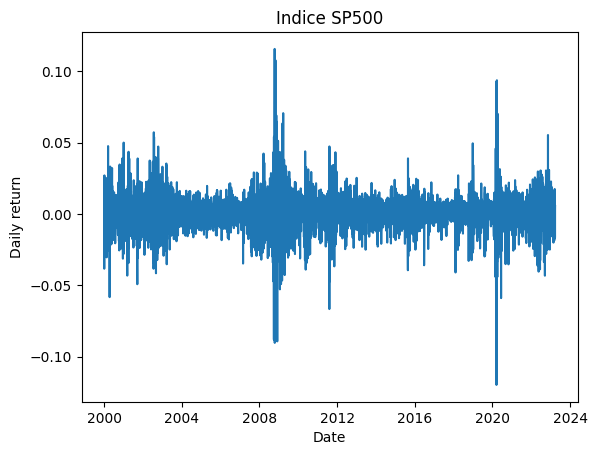

In [29]:
# Creamos un DataFrame con algunas variables de prueba
datos = GSPC

# Graficamos las dos variables utilizando la función plot() de Pandas
plt.plot(datos['Date'], datos['daily_return'], label='Adj Close')

# Agregamos título y etiquetas a los ejes
plt.title('Indice SP500')
plt.xlabel('Date')
plt.ylabel('Daily return')

# Mostramos el gráfico
plt.show()

#### Exportamos el dataset

In [30]:
# Exportamos la data a un csv
GSPC.to_csv('GSPC.csv', index=False)

### **S&P500 Company**

In [ ]:
# Descarga la lista de empresas del S&P 500 desde Wikipedia
sp500_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_list

In [33]:
# Renombrar los 2 valores de la columna 'Symbol' en el dataframe, para evitar conflicto al extraer la data de los mismos.
sp500_list['Symbol'].replace({'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}, inplace=True)

In [36]:
#
sp500_list.isnull().sum()

Symbol                    0
Security                  0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date added               10
CIK                       0
Founded                   0
dtype: int64

In [38]:
# Obtén los símbolos de las empresas del S&P 500
sp500_symbols = sp500_list['Symbol']

503

#### Webscraping S&P500 company

In [39]:
# descargar los datos de todas las empresas en un solo DataFrame
sp500_data = pd.DataFrame()
for symbol in sp500_symbols:
    data = yf.download(symbol, start="2000-01-01", end="2023-03-26")
    data['Symbol'] = symbol # agregar una columna con el símbolo de la empresa
    data = data.rename(columns={'Date': 'date'}) # renombrar la columna de fecha
    sp500_data = sp500_data.append(data)

[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed

C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\ADA\AppData\Local\Temp\ipykernel_11248\2513910862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


###

In [257]:
sp500_data

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525524,2173400,MMM
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511251,2713800,MMM
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221237,3699400,MMM
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249744,5975800,MMM
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790691,4101200,MMM
...,...,...,...,...,...,...,...,...
2627036,2023-03-20,164.000000,165.949997,163.699997,165.820007,165.820007,2145800,ZTS
2627037,2023-03-21,166.649994,166.990005,165.139999,166.240005,166.240005,2453500,ZTS
2627038,2023-03-22,165.389999,165.940002,161.320007,161.380005,161.380005,1475600,ZTS
2627039,2023-03-23,162.000000,165.449997,159.389999,161.240005,161.240005,3560800,ZTS


#### Merge

In [299]:
df_merge = pd.merge(sp500_data,sp500_list, on='Symbol')
df_merge.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525524,2173400,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511251,2713800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [301]:
# eliminar las columnas "columna1" y "columna2"
df_merge = df_merge.drop(['Headquarters Location', 'Date added', 'CIK', 'Founded'], axis=1)

In [302]:
# Renombrar nombre de columnas
df_merge = df_merge.rename(columns={'GICS Sector': 'Sector', 'GICS Sub-Industry': 'SubIndustry'})
df_merge.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,Sector,SubIndustry
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525524,2173400,MMM,3M,Industrials,Industrial Conglomerates
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511251,2713800,MMM,3M,Industrials,Industrial Conglomerates


In [303]:
# Agregar una nueva columna con el día de la semana correspondiente
df_merge['Day'] = df_merge['Date'].dt.day_name()
df_merge.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,Sector,SubIndustry,Day
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525524,2173400,MMM,3M,Industrials,Industrial Conglomerates,Monday
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511251,2713800,MMM,3M,Industrials,Industrial Conglomerates,Tuesday


### **KPIs**

In [307]:
df = df_merge

#### Rendimiento diario

In [308]:
# Agrupamos los datos por Symbol y aplicamos la función de retorno porcentual diario
df["daily_return"]= df.groupby('Symbol')['Adj Close'].pct_change()
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,Sector,SubIndustry,Day,daily_return
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525524,2173400,MMM,3M,Industrials,Industrial Conglomerates,Monday,NaN
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511251,2713800,MMM,3M,Industrials,Industrial Conglomerates,Tuesday,-0.039736


In [309]:
# Generado por la aplicación del calculo financiero
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Symbol            0
Security          0
Sector            0
SubIndustry       0
Day               0
daily_return    503
dtype: int64

In [310]:
# Reemplazar el valor nulo (NaN) por 0 en la columna "daily_return"
df['daily_return'] = df['daily_return'].fillna(0)

In [311]:
# Verificamos
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Symbol          0
Security        0
Sector          0
SubIndustry     0
Day             0
daily_return    0
dtype: int64

In [ ]:
df_merge.isnull().sum()

#### Volatilidad

In [59]:
# Agrupar el DataFrame por Symbol
gb= df.groupby('Symbol')

# Calcular el logaritmo natural de los retornos diarios para cada Symbol
log_returns = gb.apply(lambda x: np.log(x['Close']/x['Open']))

# Calcular la desviación estándar de los logaritmos de los retornos diarios para cada Symbol
std_devs = log_returns.groupby('Symbol').std()

# Multiplicar la desviación estándar por la raíz cuadrada del número de días para obtener la volatilidad anualizada
volatilities = std_devs * np.sqrt(252)

# Crear un nuevo DataFrame que contenga la volatilidad para cada Symbol
df_vol = pd.DataFrame(volatilities, columns=['Volatility'])

In [60]:
df_vol

,Volatility
Symbol,
A,0.352872
AAL,0.596258
AAP,0.271150
AAPL,0.322709
ABBV,0.228884
...,...
YUM,0.246867
ZBH,0.234603
ZBRA,0.331769


In [61]:
df_vol = df_vol.reset_index()

In [62]:
df_vol.head(2)

,Symbol,Volatility
0,A,0.352872
1,AAL,0.596258


In [57]:
df_lista = df[["Symbol","Sector"]]
df_lista = df_lista.drop_duplicates()

In [69]:
df_vol = pd.merge(df_lista,df_vol, on='Symbol')
df_vol.head(2) 

,Symbol,Sector,Volatility
0,MMM,Industrials,0.202496
1,AOS,Industrials,0.293814


In [65]:
Sort_vol = df_vol.sort_values(by='Volatility', ascending=False)

In [66]:
# Volatilidad anualizada
Sort_vol

,Symbol,Sector,Volatility
173,ENPH,Information Technology,0.720630
321,MRNA,Health Care,0.694177
29,AAL,Industrials,0.596258
179,EQIX,Real Estate,0.580280
252,INCY,Health Care,0.577118
...,...,...,...
370,PEP,Consumer Staples,0.177122
383,PG,Consumer Staples,0.175563
220,GIS,Consumer Staples,0.174442
269,JNJ,Health Care,0.163271


In [67]:
df_vol.to_csv('volatilidad.csv', index=False)

#### Retornos gaps

In [318]:
# agregar columna de diferencia entre "Open" y "Close" de la fecha anterior
prev_close = df.groupby('Symbol')['Close'].shift(1)

# calcular la diferencia entre "Open" actual y "Close" anterior
df_gap = df['Open'] - prev_close

# calcular los retornos gaps
df['Gap_Returns'] = df_gap / (prev_close - df['Close'])

In [319]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,Sector,SubIndustry,Day,daily_return,Gap_Returns
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525524,2173400,MMM,3M,Industrials,Industrial Conglomerates,Monday,0.000000,NaN
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511251,2713800,MMM,3M,Industrials,Industrial Conglomerates,Tuesday,-0.039736,-0.400000
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221237,3699400,MMM,3M,Industrials,Industrial Conglomerates,Wednesday,0.028966,-0.190476
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249744,5975800,MMM,3M,Industrials,Industrial Conglomerates,Thursday,0.080429,-0.141667
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790691,4101200,MMM,3M,Industrials,Industrial Conglomerates,Friday,0.019851,-0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627036,2023-03-20,164.000000,165.949997,163.699997,165.820007,165.820007,2145800,ZTS,Zoetis,Health Care,Pharmaceuticals,Monday,0.008208,0.348147
2627037,2023-03-21,166.649994,166.990005,165.139999,166.240005,166.240005,2453500,ZTS,Zoetis,Health Care,Pharmaceuticals,Tuesday,0.002533,-1.976167
2627038,2023-03-22,165.389999,165.940002,161.320007,161.380005,161.380005,1475600,ZTS,Zoetis,Health Care,Pharmaceuticals,Wednesday,-0.029235,-0.174898
2627039,2023-03-23,162.000000,165.449997,159.389999,161.240005,161.240005,3560800,ZTS,Zoetis,Health Care,Pharmaceuticals,Thursday,-0.000868,4.428556


In [ ]:
# Reemplazar el valor nulo (NaN) por 0 como resultado del calculo financiero 
df['Gap_Returns'] = df['Gap_Returns'].fillna(0)

### Exportamos el dataframe

In [356]:
# Exportamos los datos del dataframe en un archivo CSV
df.to_csv('S&P500_companies.csv', index=False)

### Sector

In [362]:
# Agrupar por sector y contar la cantidad de empresas en cada sector
sp500_sector_cant = sp500_companies.groupby("Sector")["Symbol"].nunique()

In [363]:
sp500_sector_cant

Sector
Communication Services    24
Consumer Discretionary    53
Consumer Staples          37
Energy                    23
Financials                73
Health Care               65
Industrials               73
Information Technology    66
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

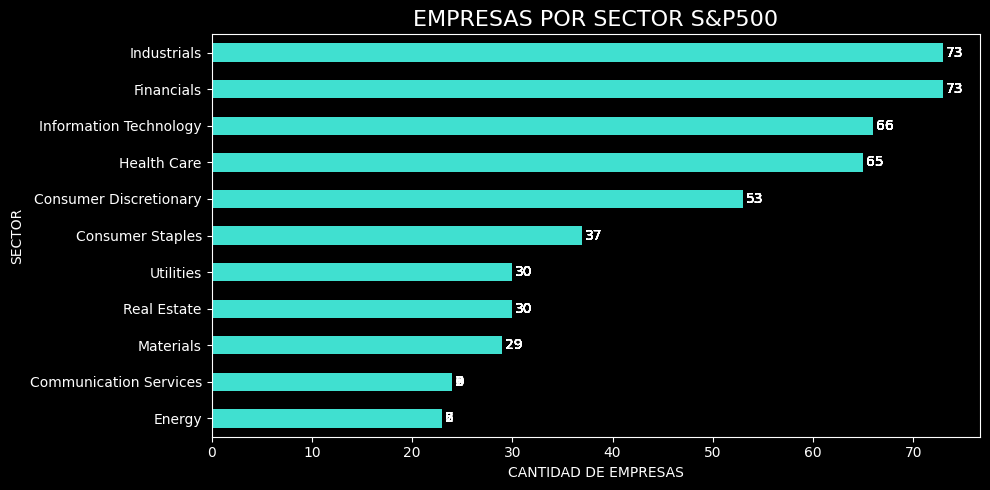

In [418]:
# Ordenar los valores de manera descendente
df_sorted = sp500_sector_cant.sort_values()

# Generar el gráfico de barras horizontal
plt.style.use('dark_background')
ax = df_sorted.plot(kind='barh', color='turquoise', figsize=(10, 5))

# Configurar las etiquetas de las barras
heights = []
for patch in ax.containers:
    for bar in patch:
        heights.append(bar.get_width())

labels = [f"{int(round(h))}" for h in heights]
for height, label in zip(heights, labels):
    ax.bar_label(ax.containers[0], label, label_type='edge', padding= 2, color='white')

# Configurar el estilo del gráfico
ax.set_title('EMPRESAS POR SECTOR S&P500', color='white', fontsize=16)
ax.set_xlabel('CANTIDAD DE EMPRESAS', color='white', fontsize=10)
ax.set_ylabel('SECTOR', color='white', fontsize=(10))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()

# Mostrar el gráfico
plt.show()